In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import MultiComparison
from scipy.stats import spearmanr, pearsonr
pd.set_option('display.width', 2000)

In [33]:
nucleus_df = pd.read_csv('csv/nuclei_dagny.csv')
print(nucleus_df.head())

  Condition                                  ImageName  Label    Area                                           Centroid         CellType  Location  Ch1Intensity  Ch2Intensity  Ch3Intensity  Ch4Intensity
0   Control  291123_B2_766cntr_NeuN-Arc-GFP_S1_HPC.czi      1  2198.0  (8.411737943585077, 3200.1624203821657, 1855.0...  neunPositiveLow       NaN     24.656051     21.252047      8.360783    174.751137
1   Control  291123_B2_766cntr_NeuN-Arc-GFP_S1_HPC.czi      2  1610.0  (16.583229813664595, 1307.6658385093167, 892.5...        Undefined       NaN      1.963975     20.104969      6.442236    161.168944
2   Control  291123_B2_766cntr_NeuN-Arc-GFP_S1_HPC.czi      3  1939.0  (13.037132542547704, 3339.4445590510572, 1830....  neunPositiveLow       NaN     25.970088     26.956679      9.847344    195.312017
3   Control  291123_B2_766cntr_NeuN-Arc-GFP_S1_HPC.czi      4  2431.0  (12.726450020567668, 1591.2558617852735, 1883....  neunPositiveLow       NaN     46.860551     32.361168     10.3

In [37]:
result = nucleus_df.groupby('ImageName').apply(lambda x: pearsonr(x['Ch1Intensity'], x['Ch3Intensity']))
print(result)

ImageName
291123_B2_766cntr_NeuN-Arc-GFP_S1_HPC.czi    (0.20756555313029898, 2.2305645455684627e-200)
291123_B4_808cntr_NeuN-Arc-GFP_S1_HPC.czi                        (0.46720138178970666, 0.0)
291123_B5_809cntr_NeuN-Arc-GFP_S2_HPC.czi                          (0.594156200563144, 0.0)
dtype: object


In [38]:
correlation_coefficients = result.apply(lambda x: x.correlation)
p_values = result.apply(lambda x: x.pvalue)
print(correlation_coefficients)
print(p_values)

ImageName
291123_B2_766cntr_NeuN-Arc-GFP_S1_HPC.czi    0.207566
291123_B4_808cntr_NeuN-Arc-GFP_S1_HPC.czi    0.467201
291123_B5_809cntr_NeuN-Arc-GFP_S2_HPC.czi    0.594156
dtype: float64
ImageName
291123_B2_766cntr_NeuN-Arc-GFP_S1_HPC.czi    2.230565e-200
291123_B4_808cntr_NeuN-Arc-GFP_S1_HPC.czi     0.000000e+00
291123_B5_809cntr_NeuN-Arc-GFP_S2_HPC.czi     0.000000e+00
dtype: float64


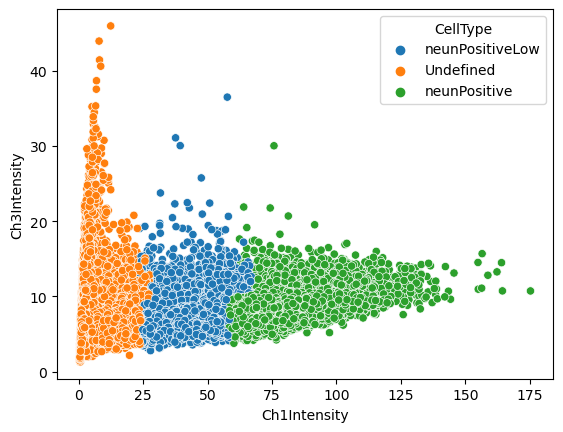

In [39]:
sns.scatterplot(data=nucleus_df[nucleus_df['Condition'] == 'Control'], x='Ch1Intensity', y='Ch3Intensity', hue='CellType')
plt.show()

In [ ]:
sns.scatterplot(data=nucleus_df[nucleus_df['Condition'] == 'HeterozygousKnockout'], x='Ch1Intensity', y='Ch3Intensity', hue='CellType')
plt.show()